# Sistema de recomendación - V2

>**Importar librerias**

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import datetime
import os
from scipy.sparse import csr_matrix

In [74]:
p_colores = [
    '#EF5350',
    '#EC407A',
    '#AB47BC',
    '#5C6BC0',
    '#42A5F5',
    '#26C6DA',
    '#26A69A',
    '#66BB6A',
    '#D4E157',
    '#FFCA28',
    '#FF7043'
]

## Obtención y preparación de los datos






In [75]:
from google.colab import drive
drive.mount('/content/drive')
ruta = 'drive/MyDrive/ICARO/Datasets/TP3/archivos/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:

# Lista los archivos en la carpeta
archivos = os.listdir(ruta)

# Imprime la lista de nombres de archivo
for archivo in archivos:
    print(archivo)

u.genre
u.occupation
u.info
mku.sh
u.user
allbut.pl
u.data
u5.base
u3.base
u4.base
u2.test
u2.base
u1.test
u3.test
README
u.item
u4.test
u1.base
u5.test
ua.test
ub.test
ua.base
ub.base


###Géneros de las películas

In [78]:
#Lista de generos
g_cols= ['genreName', 'genreId' ]
dsGenre = pd.read_csv(ruta + 'u.genre', sep='|', names=g_cols)
dsGenre.columns
dsGenre.head(100)

genreName  genreId
0       unknown        0
1        Action        1
2     Adventure        2
3     Animation        3
4    Children's        4
5        Comedy        5
6         Crime        6
7   Documentary        7
8         Drama        8
9       Fantasy        9
10    Film-Noir       10
11       Horror       11
12      Musical       12
13      Mystery       13
14      Romance       14
15       Sci-Fi       15
16     Thriller       16
17          War       17
18      Western       18

###Ocupaciones

In [79]:
#Lista de ocupaciones
o_cols = ['occupation']
dsOccupations = pd.read_csv(ruta + 'u.occupation', names=o_cols, encoding='latin-1')
dsOccupations.head(6)

occupation
0  administrator
1         artist
2         doctor
3       educator
4       engineer
5  entertainment

In [121]:
#u.info
#943 users
#1682 items
#100000 ratings

###Usuarios

In [80]:
#Lista de usuarios
u_cols = ['userId','age','gender','occupation','zipCode']
dsUsers = pd.read_csv(ruta + 'u.user', sep='|', names=u_cols, encoding='latin-1')
dsUsers.head(6)

userId  age gender  occupation zipCode
0       1   24      M  technician   85711
1       2   53      F       other   94043
2       3   23      M      writer   32067
3       4   24      M  technician   43537
4       5   33      F       other   15213
5       6   42      M   executive   98101

In [123]:
dsUsers.shape

(943, 5)

In [8]:
dsUsers.isna().sum()

userId        0
age           0
gender        0
occupation    0
zipCode       0
dtype: int64

In [9]:
dsUsers.age.describe()

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

Los usuarios tienen entre 7 y 73 años con una media de 34 años.

array([[<Axes: title={'center': 'age'}>]], dtype=object)

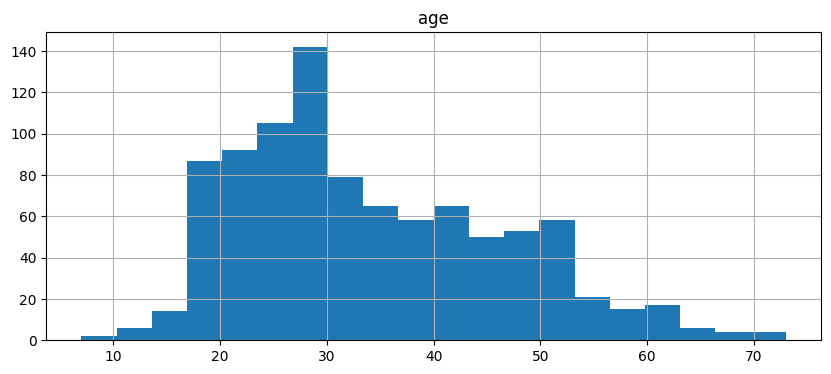

In [126]:
dsUsers.hist('age',bins=20,figsize=(10,4))

In [127]:
dsUsers.gender.value_counts()

M    670
F    273
Name: gender, dtype: int64

Ocupación y género

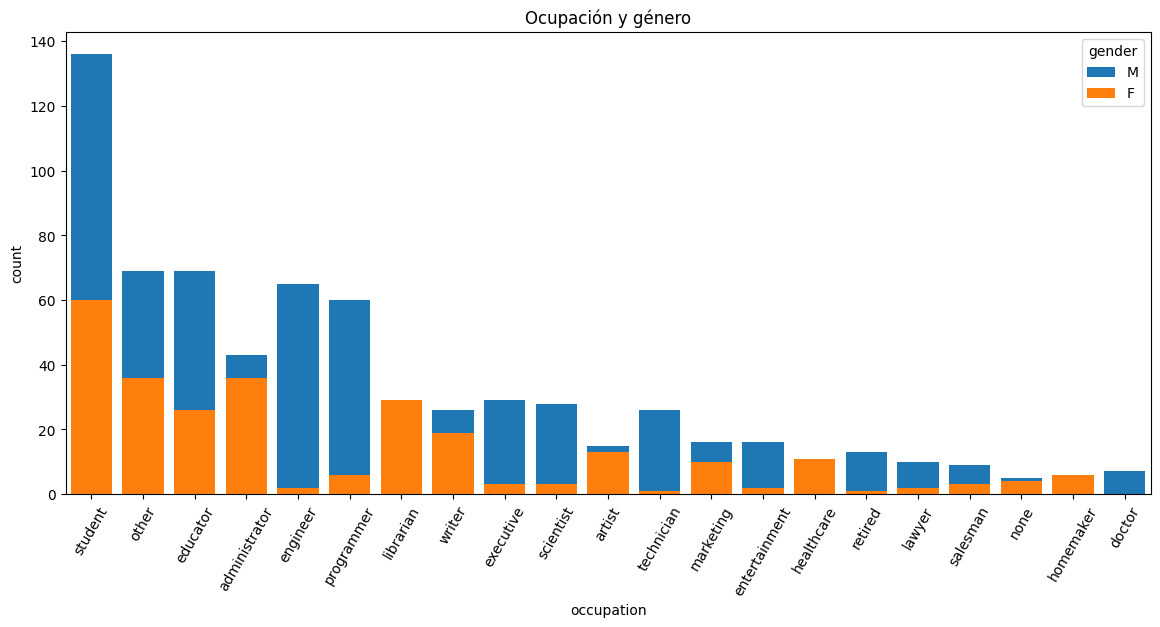

In [10]:
fig = plt.figure(figsize=(14, 6)) #ancho
ax = plt.axes()
ax = sns.countplot(hue='gender', x='occupation', saturation=1, dodge=False, data=dsUsers, order=dsUsers.occupation.value_counts().index)
plt.xticks(rotation=60)
plt.title("Ocupación y género")
plt.show()

###Películas

In [81]:
#Lista de películas
m_cols = ['movieId', 'movieTitle' , 'releaseDate','videoReleaseDate',
          'imdbUrl','unknown','action','adventure','animation','children','comedy',
          'crime','documentary','drama','fantasy', 'filmNoir','horror','musical',
          'mystery','romance','sciFi','thriller','war','western' ]
dsMovies = pd.read_csv(ruta + 'u.item', sep='|', names=m_cols, encoding='latin-1')
dsMovies.sample(6)

movieId                          movieTitle  releaseDate  \
500       501                        Dumbo (1941)  01-Jan-1941   
1301     1302                Late Bloomers (1996)  06-Jun-1997   
1349     1350           Crows and Sparrows (1949)  01-Jan-1949   
1222     1223             King of the Hill (1993)  01-Jan-1993   
1348     1349              Mille bolle blu (1993)  01-Jan-1993   
64         65  What's Eating Gilbert Grape (1993)  01-Jan-1993   

      videoReleaseDate                                            imdbUrl  \
500                NaN    http://us.imdb.com/M/title-exact?Dumbo%20(1941)   
1301               NaN  http://us.imdb.com/M/title-exact?Late%20Bloome...   
1349               NaN      http://us.imdb.com/Title?Wuya+yu+maque+(1949)   
1222               NaN  http://us.imdb.com/M/title-exact?King%20of%20t...   
1348               NaN  http://us.imdb.com/M/title-exact?Mille%20bolle...   
64                 NaN  http://us.imdb.com/M/title-exact?What's%20Eati...   

      unknown  action  adventure  animation  children  ...  fantasy  filmNoir  \
500         0       0          0          1         1  ...        0         0   
1301        0       0          0          0         0  ...        0         0   
1349        0       0          0          0         0  ...        0         0   
1222        0       0          0          0         0  ...        0         0   
1348        0       0          0          0         0  ...        0         0   
64          0       0          0          0         0  ...        0         0   

      horror  musical  mystery  romance  sciFi  thriller  war  western  
500        0        1        0        0      0         0    0        0  
1301       0        0        0        0      0         0    0        0  
1349       0        0        0        0      0         0    0        0  
1222       0        0        0        0      0         0    0        0  
1348       0        0        0        0      0         0    0        0  
64         0        0        0        0      0         0    0        0  

[6 rows x 24 columns]

In [12]:
dsMovies.shape

(1682, 24)

In [13]:
dsMovies.isna().sum()

movieId                0
movieTitle             0
releaseDate            1
videoReleaseDate    1682
imdbUrl                3
unknown                0
action                 0
adventure              0
animation              0
children               0
comedy                 0
crime                  0
documentary            0
drama                  0
fantasy                0
filmNoir               0
horror                 0
musical                0
mystery                0
romance                0
sciFi                  0
thriller               0
war                    0
western                0
dtype: int64

In [82]:
dsMovies.describe().transpose()

count        mean         std  min     25%    50%      75%  \
movieId           1682.0  841.500000  485.695893  1.0  421.25  841.5  1261.75   
videoReleaseDate     0.0         NaN         NaN  NaN     NaN    NaN      NaN   
unknown           1682.0    0.001189    0.034473  0.0    0.00    0.0     0.00   
action            1682.0    0.149227    0.356418  0.0    0.00    0.0     0.00   
adventure         1682.0    0.080262    0.271779  0.0    0.00    0.0     0.00   
animation         1682.0    0.024970    0.156081  0.0    0.00    0.0     0.00   
children          1682.0    0.072533    0.259445  0.0    0.00    0.0     0.00   
comedy            1682.0    0.300238    0.458498  0.0    0.00    0.0     1.00   
crime             1682.0    0.064804    0.246253  0.0    0.00    0.0     0.00   
documentary       1682.0    0.029727    0.169882  0.0    0.00    0.0     0.00   
drama             1682.0    0.431034    0.495368  0.0    0.00    0.0     1.00   
fantasy           1682.0    0.013080    0.113650  0.0    0.00    0.0     0.00   
filmNoir          1682.0    0.014269    0.118632  0.0    0.00    0.0     0.00   
horror            1682.0    0.054697    0.227455  0.0    0.00    0.0     0.00   
musical           1682.0    0.033294    0.179456  0.0    0.00    0.0     0.00   
mystery           1682.0    0.036266    0.187008  0.0    0.00    0.0     0.00   
romance           1682.0    0.146849    0.354061  0.0    0.00    0.0     0.00   
sciFi             1682.0    0.060048    0.237646  0.0    0.00    0.0     0.00   
thriller          1682.0    0.149227    0.356418  0.0    0.00    0.0     0.00   
war               1682.0    0.042212    0.201131  0.0    0.00    0.0     0.00   
western           1682.0    0.016052    0.125714  0.0    0.00    0.0     0.00   

                     max  
movieId           1682.0  
videoReleaseDate     NaN  
unknown              1.0  
action               1.0  
adventure            1.0  
animation            1.0  
children             1.0  
comedy               1.0  
crime                1.0  
documentary          1.0  
drama                1.0  
fantasy              1.0  
filmNoir             1.0  
horror               1.0  
musical              1.0  
mystery              1.0  
romance              1.0  
sciFi                1.0  
thriller             1.0  
war                  1.0  
western              1.0

In [83]:
#Se elimina la columna video release date por ser todos nulos
#Se elimina la columna imdbUrl por no considerarla relevante para el modelo
dsMovies = dsMovies.drop(['videoReleaseDate', 'imdbUrl'], axis= 1)

In [84]:
#convertir a tipo fecha
dsMovies['releaseDate'] = pd.to_datetime(dsMovies['releaseDate'])

La fecha de release de las películas es entre 1922 y 1998.

In [17]:
dsMovies.releaseDate.min()

Timestamp('1922-01-01 00:00:00')

In [16]:
dsMovies.releaseDate.max()

Timestamp('1998-10-23 00:00:00')

Los generos más presentes en las películas son drama y comedia

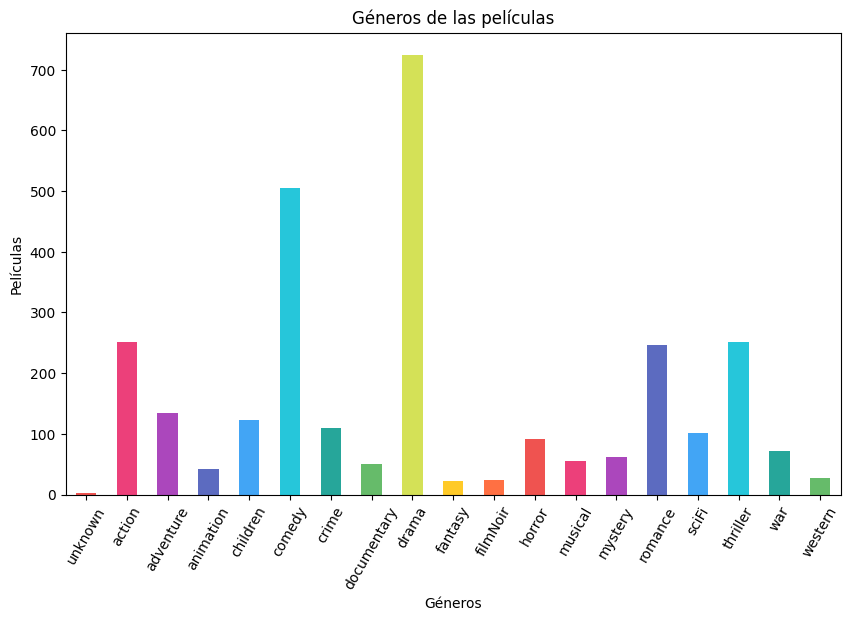

In [85]:
c_gen = ['unknown','action','adventure','animation','children','comedy',
          'crime','documentary','drama','fantasy', 'filmNoir','horror','musical',
          'mystery','romance','sciFi','thriller','war','western']
# Calcular las sumas de cada columna
sumas_por_columna = dsMovies[c_gen].sum()
fig = plt.figure(figsize=(10, 6)) #ancho
sumas_por_columna.plot(kind='bar', color= p_colores)
plt.title('Géneros de las películas')
plt.xlabel('Géneros')
plt.ylabel('Películas')
plt.xticks(rotation=60)  # Rotar las etiquetas del eje X para una mejor legibilidad
plt.show()

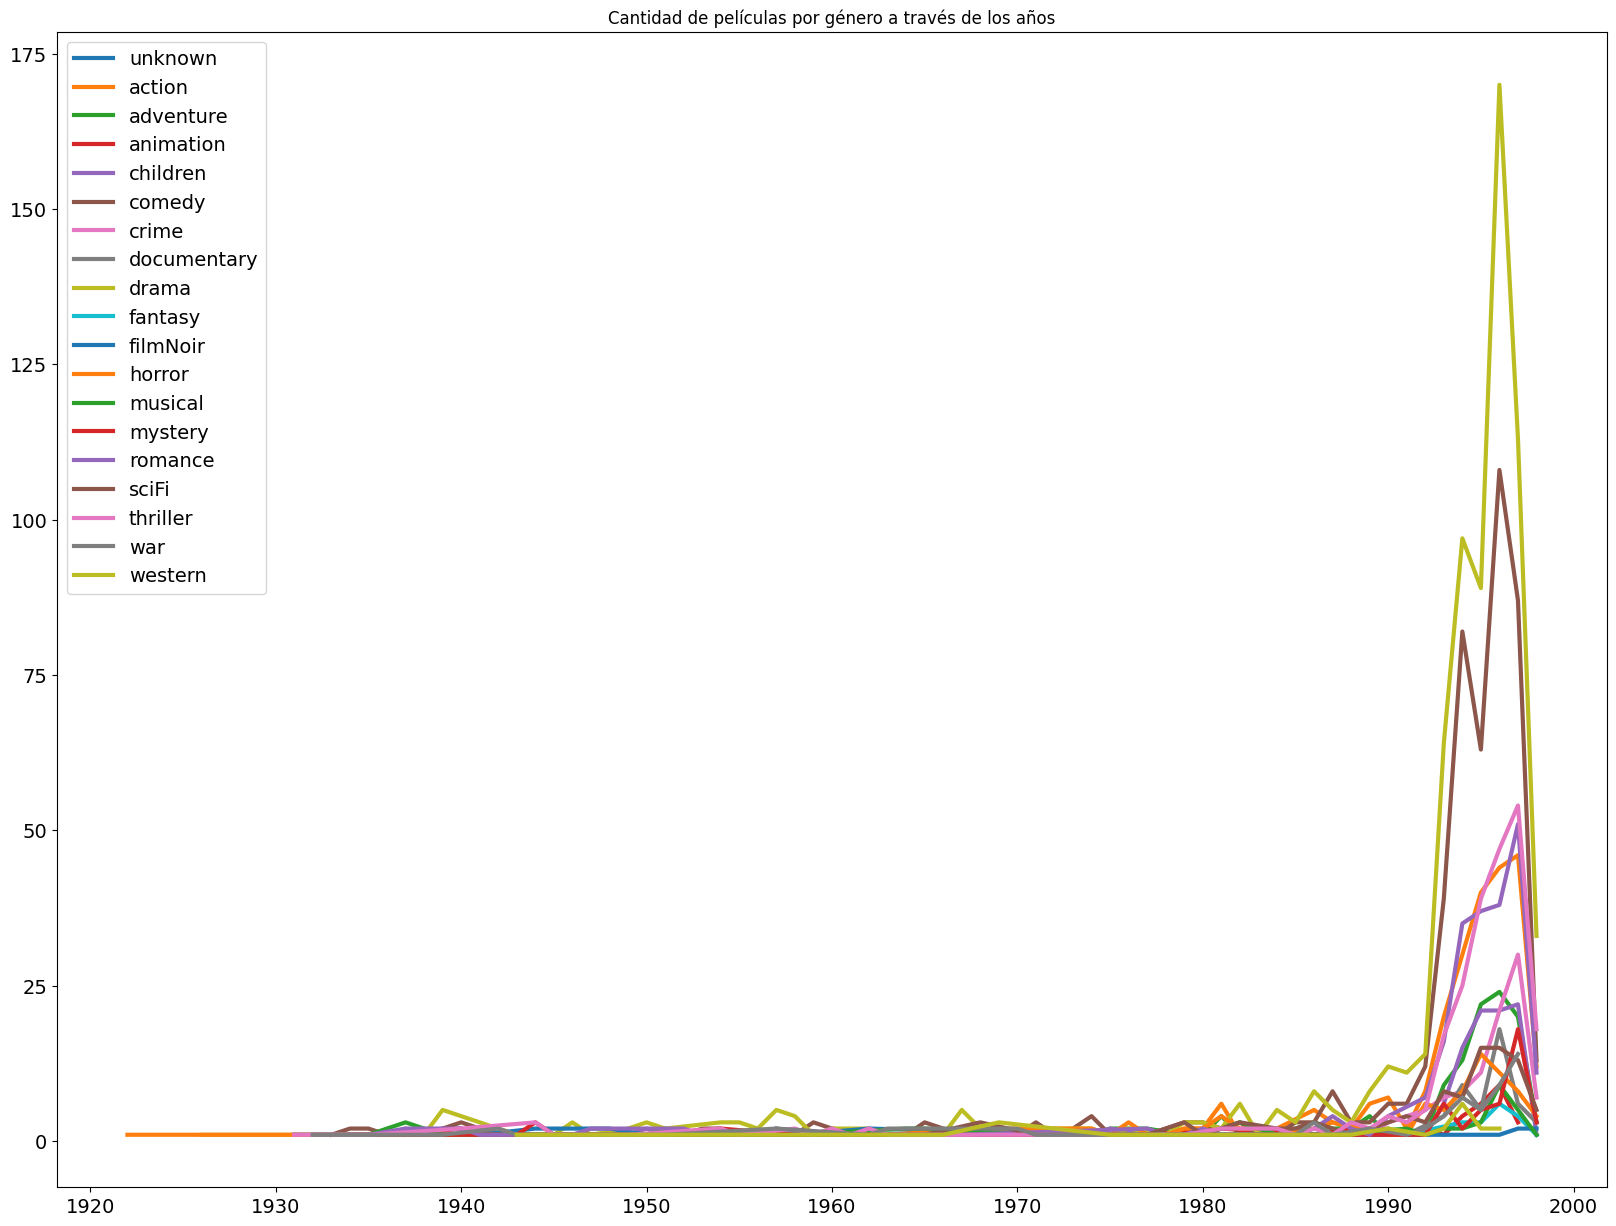

In [86]:

dsMovies2 = dsMovies.copy()
dsMovies2['releaseYear'] = pd.to_datetime(dsMovies2['releaseDate']).dt.year
plt.figure(figsize=(20,15))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
for genre in c_gen:
    df_temp = dsMovies2[dsMovies2[genre]==True][['releaseYear', 'movieId']]
    df_temp = df_temp.groupby(['releaseYear']).count().reset_index().rename(columns={'releaseYear':'year', 'movieId':'#movies'})
    plt.plot(df_temp['year'], df_temp['#movies'], label=genre, linewidth=3)
plt.title('Cantidad de películas por género a través de los años')
plt.legend(fontsize= 14)
plt.show()

###Valoraciones de los usuarios (ratings)

In [87]:
#Lista de ratings de usuarios
r_cols = ['userId','movieId','rating','timestamp']
dsRatings = pd.read_csv(ruta + 'u.data', sep='\t', names=r_cols, encoding='latin-1')
dsRatings.head(6)

userId  movieId  rating  timestamp
0     196      242       3  881250949
1     186      302       3  891717742
2      22      377       1  878887116
3     244       51       2  880606923
4     166      346       1  886397596
5     298      474       4  884182806

In [88]:
dsRatings.shape

(100000, 4)

In [89]:
dsRatings.sample(6)

userId  movieId  rating  timestamp
6160       45      121       4  881013563
657       264      655       4  886123530
68941     841      300       4  889066780
65822     465      281       2  883532120
49928     425      200       4  878738854
77437     784      258       5  891387249

In [23]:
#Convertir el timestamp a date
%%time
for i in range(dsRatings.shape[0]):
    dsRatings.at[i,'date'] = datetime.datetime.fromtimestamp(dsRatings.at[i,'timestamp'])


CPU times: user 8.56 s, sys: 0 ns, total: 8.56 s
Wall time: 9.49 s


Valoraciones a través del tiempo

In [24]:
dsr = dsRatings.copy()
dsr = dsr.drop(['timestamp','movieId', 'userId'], axis=1)
dsr = dsr.sort_values(by='date')
dsr['year'] = dsr['date'].dt.year
dsr['month'] = dsr['date'].dt.month
df = dsr.groupby(['year' , 'month', dsr['rating']]).size().reset_index(name='cantidad')
df.columns = ['year', 'month', 'rating', 'count']

In [144]:
df.shape

(40, 4)

In [ ]:
df.head(100)

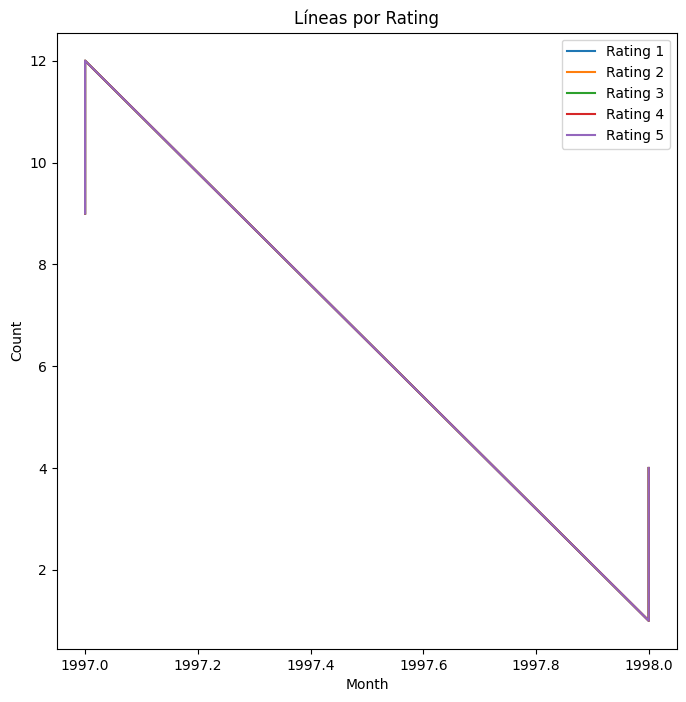

In [146]:
# Para graficar una línea por cada valor único en 'rating'
fig, ax = plt.subplots(figsize=(8, 8))

# Itera a través de los valores únicos en 'rating' y crea una línea para cada uno
for rating, group in df.groupby('rating'):
    ax.plot(group['year'], group['month'], label=f'Rating {rating}')

# Configura las etiquetas de los ejes y el título
ax.set_xlabel('Month')
ax.set_ylabel('Count')
ax.set_title('Líneas por Rating')

# Agrega una leyenda
ax.legend()

# Muestra el gráfico
plt.show()

###Ratings

In [25]:
dsRatings.rating.describe()

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Las valoraciones son entre el 20/09/1997 al 22/04/1998

In [26]:
dsRatings.date.min()

Timestamp('1997-09-20 03:05:10')

In [149]:
dsRatings.date.max()

Timestamp('1998-04-22 23:10:38')

Las valoraciones son generalemente buenas

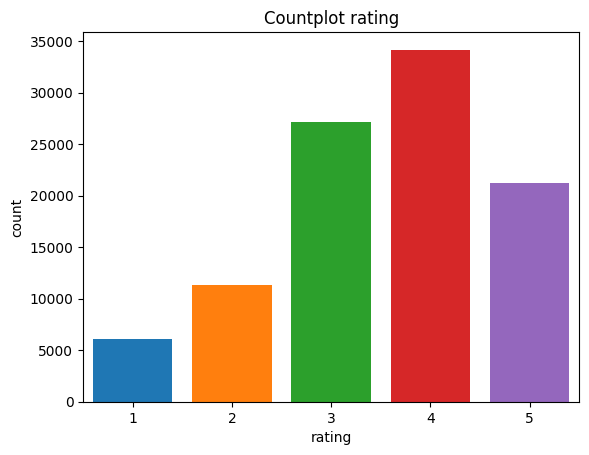

In [27]:
#Graficas
#como se distribuye la variable rating
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='rating', data=dsRatings, saturation=1)
plt.title("Countplot rating")
plt.show()

## Entrenamiento y predicción

Agregar los lotes de archivos a una lista

In [28]:
 #Crear el dataset para entrenar
#train = dsRatings[(dsRatings.timestamp >= datetime(year=1998, month=1, day=1)) &        (dsRatings.timestamp < datetime(year=1999, month=1, day=1))]
#Generar dataframes para entrenamiento
from datetime import datetime
nfiles = 5
lista_dfsBase = []
lista_dfsTest = []
r_cols = ['userId','movieId','rating','timestamp']

for i in range(nfiles):
    #train
    dsb= pd.read_csv(ruta + 'u'+ str(i+1) +'.base', sep='\t', names=r_cols, encoding='latin-1')
    for j in range(dsb.shape[0]):
       dsb.at[j,'date'] = datetime.fromtimestamp(dsb.at[j,'timestamp'])
    lista_dfsBase.append(dsb)
    #test
    dst = pd.read_csv(ruta + 'u'+ str(i+1) +'.test', sep='\t', names=r_cols, encoding='latin-1')
    for h in range(dst.shape[0]):
       dst.at[h,'date'] = datetime.fromtimestamp(dst.at[h,'timestamp'])
    lista_dfsTest.append(dst)




In [29]:
train = lista_dfsBase[1].copy()
#test = lista_dfsTest[1].copy()

In [47]:
#train.shape

(80000, 5)

Generar la matriz de interacciones

In [31]:
matrix_columns = ["userId", "movieId", "rating"]
interactions = train[matrix_columns]
interactions.head()

userId  movieId  rating
0       1        3       4
1       1        4       3
2       1        5       3
3       1        6       5
4       1        7       4

In [156]:
interactions.movieId.nunique()

1648

In [157]:
interactions.userId.nunique()

943

Generar el pivot

In [32]:
interactions_matrix = interactions.pivot(index="userId", columns="movieId", values="rating")

In [159]:
interactions_matrix.shape

(943, 1648)

In [33]:
interactions_matrix.head()

movieId  1     2     3     4     5     6     7     8     9     10    ...  \
userId                                                               ...   
1         NaN   NaN   4.0   3.0   3.0   5.0   4.0   NaN   NaN   3.0  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

movieId  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
userId                                                               
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 1648 columns]

Completar los nulos con 0

In [35]:
interactions_matrix = interactions_matrix.fillna(0)

In [36]:
#comprimir la matriz
interactions_matrix_csr = csr_matrix(interactions_matrix.values)

In [37]:
interactions_matrix_csr

<943x1648 sparse matrix of type '<class 'numpy.float64'>'
	with 80000 stored elements in Compressed Sparse Row format>

In [39]:
#diccionario
user_ids = list(interactions_matrix.index)
user_dict = {}
counter = 0
for i in user_ids:
    user_dict[i] = counter
    counter += 1

In [ ]:
user_ids

In [ ]:
user_dict

In [165]:
interactions_matrix_csr.shape

(943, 1648)

###Entrenar usando Lightfm

In [42]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808332 sha256=ed31b30ad8abd2ce20d2c8d271844f87e98f891b998cc7cc0f6d49289599629b
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [44]:
from lightfm import LightFM
model = LightFM(no_components=3, random_state=100, learning_rate=0.03)
#no_components: complejidad
#learning_rate: tasa de aprendizaje
#epochs:veces que se recorre el set de datos

In [45]:
%%time
model = model.fit(interactions_matrix_csr, epochs=20)

CPU times: user 763 ms, sys: 364 µs, total: 763 ms
Wall time: 1.22 s


#### Generar las recomendaciones

Generar 50 recomendaciones por usuario

In [46]:
user_x = user_dict[48]
n_users, n_items = interactions_matrix.shape
item_ids = np.arange(n_items)
lista_preds = []
lista_preds_ord = []
for i in user_dict:
    user_x = user_dict[i]
    preds = model.predict(user_ids=user_x, item_ids = item_ids)
    lista_preds.append(preds)
    #ordenar los scores
    scores = pd.Series(preds)
    scores.index = interactions_matrix.columns
    preds_ord = list(pd.Series(scores.sort_values(ascending=False).index))[:50] #obtener las primeras 50 ordenadas por score
    lista_preds_ord.append(preds_ord)


In [170]:
len(lista_preds_ord )

943

In [ ]:
lista_preds_ord

####Eliminar películas ya vistas

In [47]:
lista_preds_ord_final = []
for i in user_dict:
   #peliculas que vio el user i
   user_x = user_dict[i]
   user_x_watched = train[(train.userId==user_x)].movieId.unique()
   #filtrar las ya vistas
   preds_ord_final = [rec for rec in lista_preds_ord[i-1] if rec not in user_x_watched]
   lista_preds_ord_final.append(preds_ord_final)

In [67]:
len(lista_preds_ord_final)

943

In [48]:
train[(train.userId==48)].movieId.unique()

array([  28,   50,   56,   71,  132,  170,  172,  174,  181,  187,  193,
        194,  195,  202,  210,  215,  228,  243,  259,  266,  286,  289,
        302,  306,  308,  309,  323,  357,  423,  425,  427,  428,  433,
        511,  522,  524,  529,  603,  609,  650,  654,  656,  661,  680,
        690,  988, 1063])

In [ ]:
lista_preds_ord_final[90]

In [70]:
train[(train.userId==48) & (train.movieId.isin(lista_preds_ord[47]))].movieId.unique()

array([ 28,  50,  56, 172, 174, 181, 195, 210, 286, 289, 302, 423])

In [ ]:
train[(train.movieId >1000)].sample(100)

####Cold Start, puede ser mas popular o mas nuevo x ej (considerando fecha)

In [49]:
#Merge para determinar las películas más valoradas según 2 segmentos de usuarios
#F: sexo F
#M: sexo M
merge1 = pd.merge(dsRatings, dsUsers, on='userId', how='inner')

In [72]:
merge1.shape

(100000, 9)

In [72]:
merge1.sample(10)

userId  movieId  rating  timestamp                date  age gender  \
38854     351      312       5  883356784 1997-12-29 00:53:04   61      M   
6787      276      853       5  889174849 1998-03-06 09:00:49   21      M   
41907     387      224       5  886480703 1998-02-03 04:38:23   33      M   
82044     764       56       4  876244472 1997-10-07 17:14:32   27      F   
1932      200      890       4  884127082 1998-01-06 22:51:22   40      M   
80903     751      239       4  889134237 1998-03-05 21:43:57   24      F   
94305     889      147       3  880176926 1997-11-22 05:35:26   24      M   
32056     175       31       4  877108051 1997-10-17 17:07:31   26      F   
34701     326       67       2  879877284 1997-11-18 18:21:24   41      M   
2951      194      568       2  879522819 1997-11-14 15:53:39   38      M   

          occupation zipCode  
38854       educator   49938  
6787         student   95064  
41907  entertainment   37412  
82044       educator   62903  
1932      programmer   93402  
80903          other   90034  
94305     technician   78704  
32056      scientist   21911  
34701  administrator   15235  
2951   administrator   02154

In [50]:
resultado = pd.merge(merge1, dsMovies, on ='movieId', how='inner')

In [74]:
resultado.sample(5)

userId  movieId  rating  timestamp                date  age gender  \
63934     326      282       2  879875964 1997-11-18 17:59:24   41      M   
47780     456      268       5  887165395 1998-02-11 02:49:55   24      M   
12000     402      100       5  876266904 1997-10-07 23:28:24   30      M   
62663     481      199       5  885828543 1998-01-26 15:29:03   73      M   
74120     883       49       3  891694636 1998-04-04 12:57:16   49      M   

          occupation zipCode                            movieTitle  ...  \
63934  administrator   15235                Time to Kill, A (1996)  ...   
47780     technician   31820                    Chasing Amy (1997)  ...   
12000       engineer   95129                          Fargo (1996)  ...   
62663        retired   37771  Bridge on the River Kwai, The (1957)  ...   
74120      librarian   50266                           I.Q. (1994)  ...   

      fantasy  filmNoir  horror  musical  mystery  romance  sciFi  thriller  \
63934       0         0       0        0        0        0      0         0   
47780       0         0       0        0        0        1      0         0   
12000       0         0       0        0        0        0      0         1   
62663       0         0       0        0        0        0      0         0   
74120       0         0       0        0        0        1      0         0   

       war  western  
63934    0        0  
47780    0        0  
12000    0        0  
62663    1        0  
74120    0        0  

[5 rows x 30 columns]

Filtar el resultado por fecha de release

In [51]:
cant_rec = 20
#Películas posteriores a 1995 con ratung mayor a 4
fecha_referencia = pd.to_datetime('1996-01-01')
rating_minimo = 4
cond_f = (resultado.gender == 'F') & (resultado.releaseDate >= fecha_referencia) & (resultado.rating >= rating_minimo)
cond_m = (resultado.gender == 'M') & (resultado.releaseDate >= fecha_referencia) & (resultado.rating >= rating_minimo)
grp_f = resultado[cond_f]
grp_m = resultado[cond_m]

max_ratings_f = grp_f.groupby('movieId')['rating'].agg(totRating='sum')
max_ratings_m = grp_m.groupby('movieId')['rating'].agg(totRating='sum')

In [52]:
#merge cn las películas
resultado_f = pd.merge(max_ratings_f, dsMovies, on ='movieId', how='inner')
resultado_m = pd.merge(max_ratings_m, dsMovies, on ='movieId', how='inner')

In [58]:
#ordenar por total rating
grp_f_sorted = resultado_f.sort_values(by='totRating', ascending=False)
grp_m_sorted = resultado_m.sort_values(by='totRating', ascending=False)
cols = ['movieId','totRating', 'movieTitle']
grp_f_sorted = grp_f_sorted[cols].copy()
grp_m_sorted = grp_m_sorted[cols].copy()

In [ ]:
grp_m_sorted.head(10)

In [ ]:
grp_f_sorted.head(10)

In [59]:
rgrp_f = grp_f_sorted.head(cant_rec) #recomendaciones grupo f
rgrp_m = grp_f_sorted.head(cant_rec) #recomendaciones grupo f

In [57]:
rgrp_f.sample(cant_rec)

movieId  totRating                           movieTitle
21       117        293                     Rock, The (1996)
49       237        311                 Jerry Maguire (1996)
24       121        293        Independence Day (ID4) (1996)
84       285        230                Secrets & Lies (1996)
99       300        338                 Air Force One (1997)
4         22        225                    Braveheart (1995)
78       272        224             Good Will Hunting (1997)
67       258        369                       Contact (1997)
43       222        209      Star Trek: First Contact (1996)
9        100        427                         Fargo (1996)
7         25        239                 Birdcage, The (1996)
15       111        280  Truth About Cats & Dogs, The (1996)
1         15        293            Mr. Holland's Opus (1995)
85       286        460          English Patient, The (1996)
112      313        394                       Titanic (1997)
75       269        319               Full Monty, The (1997)
87       288        310                        Scream (1996)
93       294        232                     Liar Liar (1997)
101      302        253             L.A. Confidential (1997)
40       181        400            Return of the Jedi (1983)

In [60]:
rgrp_m.sample(cant_rec)

movieId  totRating                           movieTitle
84       285        230                Secrets & Lies (1996)
7         25        239                 Birdcage, The (1996)
40       181        400            Return of the Jedi (1983)
78       272        224             Good Will Hunting (1997)
101      302        253             L.A. Confidential (1997)
85       286        460          English Patient, The (1996)
1         15        293            Mr. Holland's Opus (1995)
43       222        209      Star Trek: First Contact (1996)
4         22        225                    Braveheart (1995)
15       111        280  Truth About Cats & Dogs, The (1996)
67       258        369                       Contact (1997)
49       237        311                 Jerry Maguire (1996)
9        100        427                         Fargo (1996)
93       294        232                     Liar Liar (1997)
24       121        293        Independence Day (ID4) (1996)
99       300        338                 Air Force One (1997)
87       288        310                        Scream (1996)
21       117        293                     Rock, The (1996)
75       269        319               Full Monty, The (1997)
112      313        394                       Titanic (1997)

###Testear el modelo

Crear el diccionario de test

Se usa los datos de test y se determina si hay cold starts (usuarios)

In [198]:
n_users, n_items = interactions_matrix.shape
item_ids = np.arange(n_items)
lista_preds2 = []
lista_preds_ord2 = []
for user in lista_dfsTest[1].userId.unique():
    if user in list(interactions_matrix.index):
      user_x = user_dict[user]
      preds_test = model.predict(user_ids=user_x, item_ids = item_ids)
      lista_preds2.append(preds_test)
      #ordenar los scores
      scores_test = pd.Series(preds_test)
      scores_test.index = interactions_matrix.columns
      preds_ord_test = list(pd.Series(scores_test.sort_values(ascending=False).index))[:50] #obtenemos las primeras 30
      lista_preds_ord2.append(preds_ord_test)
    else:
      print(user)

####Evaluar el modelo usando MAP

In [81]:
dsTest =  lista_dfsTest[1].copy()

In [70]:
%%time
#Calcular MAP manual considerando al archivo de test como "interacciones reales" luego de la recomendación
dsTest =  lista_dfsTest[1].copy()
acumulado_total= 0
valores = [0, 1]
cantUsersPred = len(lista_preds_ord_final)
cantUsersTest= dsTest.userId.nunique()

for u in range(cantUsersPred):
    posicion = 0
    acumulado = 0
    cantidad = 0
    relevantes = 0
    userId = u +1

    for m in lista_preds_ord_final[u]:
      posicion += 1
      movieId = m
      #busca si el usuario vio la película (si no esta presente se asume que no la vio)
      registros_filtrados = dsTest.loc[(dsTest['userId'] == userId) & (dsTest['movieId'] == movieId)]
      if (registros_filtrados.empty):
          relevante = 0
      else:
          relevante = 1
      #print('userId:  {0}  movieId:   {1} relevante:   {2}'.format(userId, movieId,  relevante))

      if (relevante == 1) :
        relevantes += 1   # cuento la cantidad de relevantes para este user
        acumulado += (relevantes/posicion)
    #sumo al acumulado de users
    if (relevantes >=1):
      acumulado_total += (acumulado/relevantes)

print('MAP:' , acumulado_total/cantUsersTest)


MAP: 0.22243054782757413
CPU times: user 23.7 s, sys: 103 ms, total: 23.8 s
Wall time: 26.1 s


# Enunciados

ALTERNATIVA 1) Sistema de recomendación

La idea consiste en crear un modelo de recomendacion. Pueden descargar los archivos desde el siguiente link:

https://drive.google.com/drive/folders/1F58VdEmIUakN7dOvaLeEmd5xCRrSJgB6?usp=sharing


Consigna:

- El primer paso consiste en lograr leer los archivos desde el drive y armar los 2 datasets, el de entrenamiento y el de validacion.

- Se pide ademas, crear un 3er conjunto de testeo donde deberan extraer de los primeros 2 un sample y no utilizar estos datos para entrenar. Es decir, del conjunto total de datos, armar 3 dfs, training, test y validation.

- Desarrollar un recomendador. El recomendador debe ser capaz de generar recomendaciones para TODOS los usuarios (incluyendo los cold start que no tengan visualizaciones en el set de train). Generar 20 recomendaciones por usuario.
- Las recomendaciones tienen que ser para cada account_id y hay que recomendar content_id.
- Los contenidos que recomienden, no tienen que haber sido vistos previamente por los usuarios (filtrar). Se acepta solamente que se recomiende este caso si el usuario vio el contenido solamente 1 vez y el mismo posee un rating que se encuentre en el ultimo decil.
- Evaluarlo con MAP.
- Se valora la originalidad en el codigo, no es valido recrear el mismo utilizado durante las clases.


Recomendaciones:
- Al momento de leer los datos, los archivos llamados "base" forman el conjunto de training y los "test" el de test.
- Quedarse con las columnas user_id; item_id; raiting; ts
- Comenzar con algo simple
- Cuando el modelo ya este funcionando, mejorarlo e ir cubriendo los distintos requisitos.



---



ALTERNATIVA 2) Redes Neuronales

Aqui la eleccion del conjunto de datos es parte del desafio. El unico requisito es que la obtencion de la misma debe ser mediante parseo (Puede ser descargar tablas de un sitio web usando pandas, librerias tipo beautifulsoup4, aplicando tecnicas de NLP, etc) o una API.

 Como opciones se sugiere:

1.  Una red para poder clasificar observaciones (tal cual vimos en primer lugar).
2.  Utilizar imagenes como entrenamiento para predecir objetos o numeros en un conjunto desconocido (separar en training y test). En clase discutimos el tema de las patentes como una idea. Aca deberian aplicar la etapa de convolucion seguramente para dividir el dataset. Tambien podria ser analizar imagenes mediante filtros para detectar bordes, formas, etc.
3. Intentar predecir el valor de una accion o determinado bien mediante el uso de redes recurrentes.





---



ALTERNATIVA 3) Clustering

La idea principal es que primero consigan el dataset con el cual deberán trabajar. Aca tienen 2 opciones:

a) Para el que posea conocimientos del lenguaje R o quiera practicarlo, puede installar el paquete MASS y obtener el dataset de BOSTON. Si desean hacerlo aca en Google Colab, les dejo un link donde podran investigar como correr R directamente en una celda de código: https://towardsdatascience.com/how-to-use-r-in-google-colab-b6e02d736497


b) En el caso de querer trabajar solamente con Python, entonces deberan importar el dataset de california housing y transformarlo en un dataset (con su variable target obviamente). Queda como tarea averiguar en que libreria se encuentra.

Una vez que tengan su dataset, la idea es que apliquen como mínimo los 2 modelos de clustering que vimos, el de K-Means y DBScan. Es necesario que incluyan una optimizacion de hiperparametros (según las metricas de Inercia y Silueta). Cuando ya tengan segmentados los datos, tienen que analizar y encontrar las caracteristicas de cada uno.



---



Fecha de entrega y exposicion: A DEFINIR.

Como desafio adicional, e**s necesario que suban el archivo a un repositorio de github (publico)** y enviar el link del mismo al siguiente mail: martin.jaureguy.95@gmail.com o por mensaje privado en Slack.